In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [4]:
maindir = "data/" # Directory with your files
traincsv = maindir+"/Update_train.csv"
testcsv = maindir+"/Updated_Test.csv"

In [7]:
train = pd.read_csv("Update_train.csv")
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


In [9]:
train['donation_id'].value_counts()

4030     60
8194     60
2148     60
10352    60
10368    60
         ..
3147     60
9326     60
3211     60
5320     60
2081     60
Name: donation_id, Length: 486, dtype: int64

In [8]:
train.shape

(29160, 178)

## Quick look at the DATA

In [3]:
train = pd.read_csv(traincsv)
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


The goal of the competition is use the abosrbance which is spectrum to predict the hdl_cholesterol, hemoglobin and ldl_cholestorl level. These can either be low, ok or high. The absobance spectrum has 170 values over the entier frequency range. In the dataset with labels trim, the edges of the absorbance spectrum have been trimmed by Bloods-ai because they believed the edges are noisy. 

It is up to you to experiment and decide if woriking with the full range or trim range prvents the best results.

Note that the each measurement actually contains, 60 scans so a lot of the data will actually just be scans of the same measurement. So it is up to you to make sure your model doesn't overfit and is reliable to the limited variation of the data. The plan is to collect and add more data while the competion is running.

### Visualization

/Users/michaelmbugua/Desktop/zindi/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='count'>

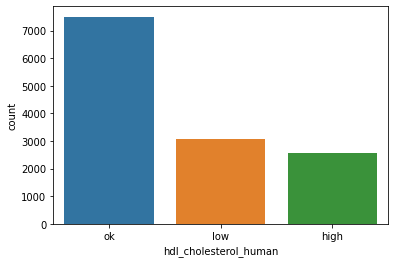

In [4]:
sns.countplot(train["hdl_cholesterol_human"])

/Users/michaelmbugua/Desktop/zindi/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hemoglobin(hgb)_human', ylabel='count'>

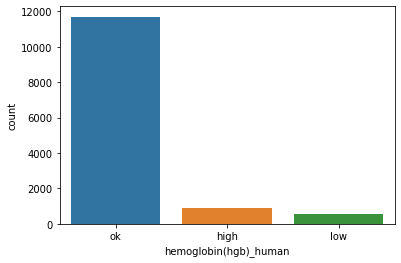

In [5]:
sns.countplot(train["hemoglobin(hgb)_human"])

/Users/michaelmbugua/Desktop/zindi/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

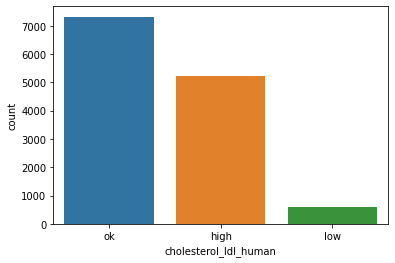

In [6]:
sns.countplot(train["cholesterol_ldl_human"])

In [7]:
train.iloc[0, 1:173]

absorbance0      0.479669
absorbance1      0.477423
absorbance2      0.487956
absorbance3      0.491831
absorbance4      0.500516
                   ...   
absorbance167    1.198317
absorbance168    1.195735
absorbance169    1.180846
temperature         42.51
humidity            34.01
Name: 0, Length: 172, dtype: object

In [8]:
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


You can drop the id column and then convert the data to numpy array

In [9]:
train.drop(["Reading_ID"], axis=1, inplace=True)
data = train.to_numpy()
print(data.shape) # 219 IDs

(13140, 175)


The first 170 columns are the abosrbance values, 170 to 172 are the temperature and humidity of the scanner, and the last 3 columns are the values you want to your model to predict 

In [10]:
features = np.array(data[:,:172], dtype=float)
labels = data[:, 172:]

So using these features and labels, you can go ahead to train you machine learning

## Saving the predictions

In [11]:
test = pd.read_csv(testcsv)
test.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_37BEI22R,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,...,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,ID_4W85V5DV,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,...,1.310219,1.294600,1.269705,1.244257,1.238365,1.218063,1.252711,1.255433,42.35,30.16
2,ID_L4YR3NDY,0.437904,0.439064,0.442527,0.450437,0.455363,0.465817,0.471249,0.479145,0.482595,...,1.162556,1.161711,1.160406,1.159570,1.159641,1.157491,1.177478,1.169607,42.83,25.51
3,ID_U88E3SQ6,0.495038,0.506246,0.508730,0.518995,0.529961,0.537583,0.539696,0.540400,0.547279,...,1.168321,1.137272,1.109380,1.047561,1.050649,1.020026,1.033139,1.023882,40.95,41.32
4,ID_NW7Z3XU7,0.531306,0.525309,0.535306,0.541387,0.551364,0.559821,0.564851,0.570824,0.577426,...,1.288590,1.287614,1.300164,1.285028,1.272818,1.277348,1.248892,1.290145,46.99,24.21


In [12]:
# save it ids before dropping them
idx = test.Reading_ID.values
test.drop(["Reading_ID"], axis=1, inplace=True)
testdata = test.to_numpy()

In [13]:
print(testdata.shape) # 61 Individuals

(3660, 172)


### Basic model example

The goal of the project is to classify the level of cholesterol low, cholesterol high and hemoglobin. Your prediction should be something of the form ok, low and high. So you will to build and train a multioutput classfier. Below is basic example using sklearn.

Key:
low  = 0,
ok   = 1,
high = 2

In [14]:
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')] = 2

In [15]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [ ]:
n_samples, n_features = features.shape
n_outputs = labels_n.shape[1]
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
model = multi_target_forest.fit(features, labels_n)

In [ ]:
multi_target_forest.score(features, labels_n)

In [ ]:
def mymodel(features):
    output = model.predict(features)
    return output

In [ ]:
predictions = mymodel(testdata)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]


In [ ]:
ss

##### - We need to transform our predictions from 0, 1, 2 to low, ok, high respectively 

In [ ]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'
        

In [ ]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [ ]:
ss.head()

#### -  Convert our submission as per the sample submission 

In [ ]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [ ]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [ ]:
def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [ ]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [ ]:
def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

In [ ]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [ ]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [ ]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [ ]:
ss = ss.rename(columns={0:"Reading_ID"})

In [ ]:
ss.head()

In [ ]:
ss.to_csv(maindir+"/submission.csv", index=False)

### To Do
- Try other models,
- Cross validation